In [1]:
from sklearn.datasets import load_boston

In [2]:
boston =load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X=boston.data
y=boston.target

In [10]:
y.shape

(506,)

In [11]:
X.shape

(506, 13)

In [12]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

## Simple linear regression

In [13]:
X_room=X[:,5]

In [14]:
X_room

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [15]:
import matplotlib.pyplot as plt

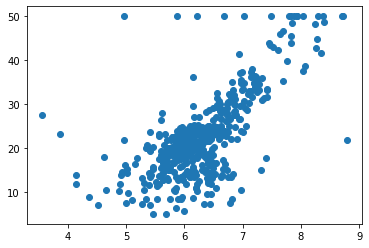

In [16]:
plt.scatter(X_room,y)

In [17]:
import numpy as np

In [18]:
np.corrcoef(X_room,y)

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model1=LinearRegression()
X_room = X_room.reshape(-1,1)
model1.fit(X_room,y)

LinearRegression()

In [21]:
model1.score(X_room,y)

0.48352545599133423

## Train test split

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_room,y)
X_train.shape

(379, 1)

In [27]:
model2=LinearRegression()
model2.fit(X_train,y_train)
print("Training Accuracy: ",model2.score(X_train,y_train))
print("Testing Accuracy: ",model2.score(X_test,y_test))      

Training Accuracy:  0.5045918402299723
Testing Accuracy:  0.40507453718918884


In [28]:
model2.coef_

array([9.32082549])

In [29]:
model2.intercept_

-35.78038138476822

## $$ y =-35.78 +9.32082549X $$ 

In [31]:
-35.78+9.32082549*10

57.42825490000001

In [32]:
-35.78+9.32082549*11

66.74908039

In [33]:
66.74908039-57.42825490000001

9.32082548999999

## Multiple linear regression

In [34]:
X_room_Cr=X[:,[0,5]]

In [35]:
X_room_Cr

array([[6.3200e-03, 6.5750e+00],
       [2.7310e-02, 6.4210e+00],
       [2.7290e-02, 7.1850e+00],
       ...,
       [6.0760e-02, 6.9760e+00],
       [1.0959e-01, 6.7940e+00],
       [4.7410e-02, 6.0300e+00]])

In [39]:
def getScores(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y)
    model=LinearRegression()
    model.fit(X_train,y_train)
    print(model.intercept_)
    print(model.coef_)
    print("Training Accuracy: ",model.score(X_train,y_train))
    print("Testing Accuracy: ",model.score(X_test,y_test))  
    

In [40]:
getScores(X_room_Cr,y)

-31.131806533972533
[-0.26009294  8.71243651]
Training Accuracy:  0.5380386992535822
Testing Accuracy:  0.5420083153438278


## $$ y=-31-0.26X_1+8.71X_2 $$